In [1]:
from PIL import Image
import csv
import numpy as np
import cv2
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture('/home/s175668/raid/Praca-Magisterska/version_01/138_kuba_site_1.avi')
i = 0
while(cap.isOpened()):
    ret, frame = cap.read()
     
    print(frame)
 
    #img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f'/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/{i}.png', frame)
 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
    i += 1
 
 
cap.release()
cv2.destroyAllWindows()

[[[ 96  95  89]
  [ 98  97  91]
  [102 101  95]
  ...
  [ 97  93  89]
  [ 97  93  89]
  [ 97  93  89]]

 [[ 96  95  89]
  [ 98  97  91]
  [102 101  95]
  ...
  [ 95  91  87]
  [ 95  91  87]
  [ 95  91  87]]

 [[ 96  95  89]
  [ 98  97  91]
  [102 101  95]
  ...
  [ 94  90  86]
  [ 94  90  86]
  [ 94  90  86]]

 ...

 [[113 157 175]
  [113 157 175]
  [113 157 175]
  ...
  [136 159 172]
  [136 159 172]
  [136 159 172]]

 [[116 162 182]
  [116 162 182]
  [116 162 182]
  ...
  [137 163 175]
  [137 163 175]
  [137 163 175]]

 [[120 166 186]
  [120 166 186]
  [120 166 186]
  ...
  [139 165 177]
  [139 165 177]
  [139 165 177]]]
[[[ 96  95  89]
  [ 96  95  89]
  [ 98  97  91]
  ...
  [ 95  91  87]
  [ 95  91  87]
  [ 95  91  87]]

 [[ 96  95  89]
  [ 96  95  89]
  [ 98  97  91]
  ...
  [ 94  90  86]
  [ 94  90  86]
  [ 94  90  86]]

 [[ 96  95  89]
  [ 96  95  89]
  [ 98  97  91]
  ...
  [ 92  88  84]
  [ 92  88  84]
  [ 92  88  84]]

 ...

 [[113 152 171]
  [113 152 171]
  [113 152 171]
  ..

None


error: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [ ]:
photos = os.listdir('/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/')

In [67]:
for i in range(0, 14, 5):
    print(i)
    if i ==0:
        background = Image.open(f'/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/{i}.png')
    else:
        background = new_img
    
    if i == 10:
        i = 8
    overlay = Image.open(f'/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/{i+5}.png')
    
#     overlay = overlay[:,:,::-1]
#     background = background[:,:,::-1]
#     background = background.convert("RGBA")
#     overlay = overlay.convert("RGBA")

    new_img = Image.blend(background, overlay, 0.35)

    
new_img.save("/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/new.png","PNG")


0
5
10


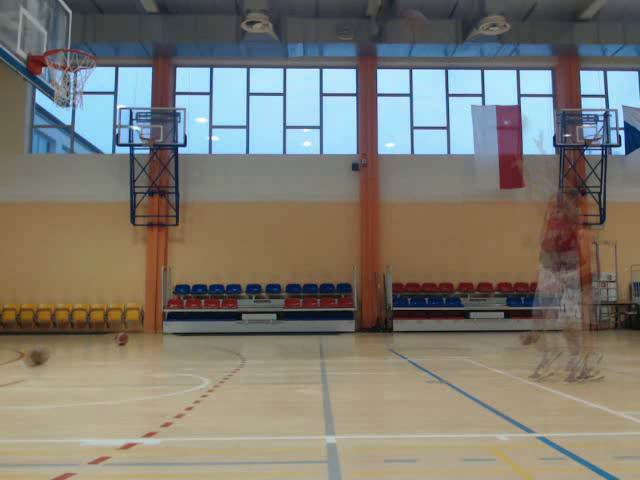

In [68]:
new_img

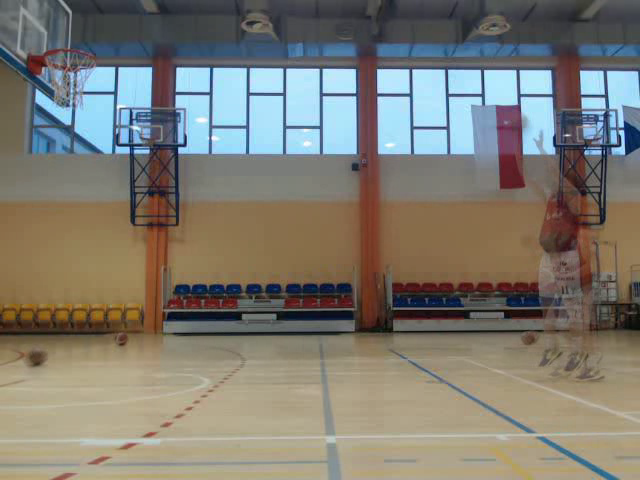

In [60]:
background

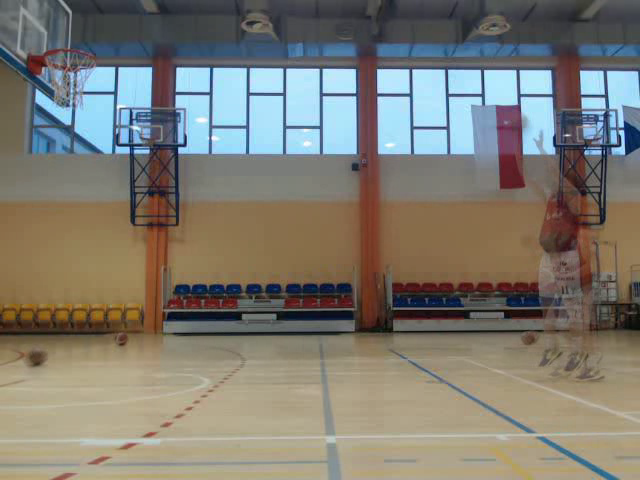

In [61]:
background

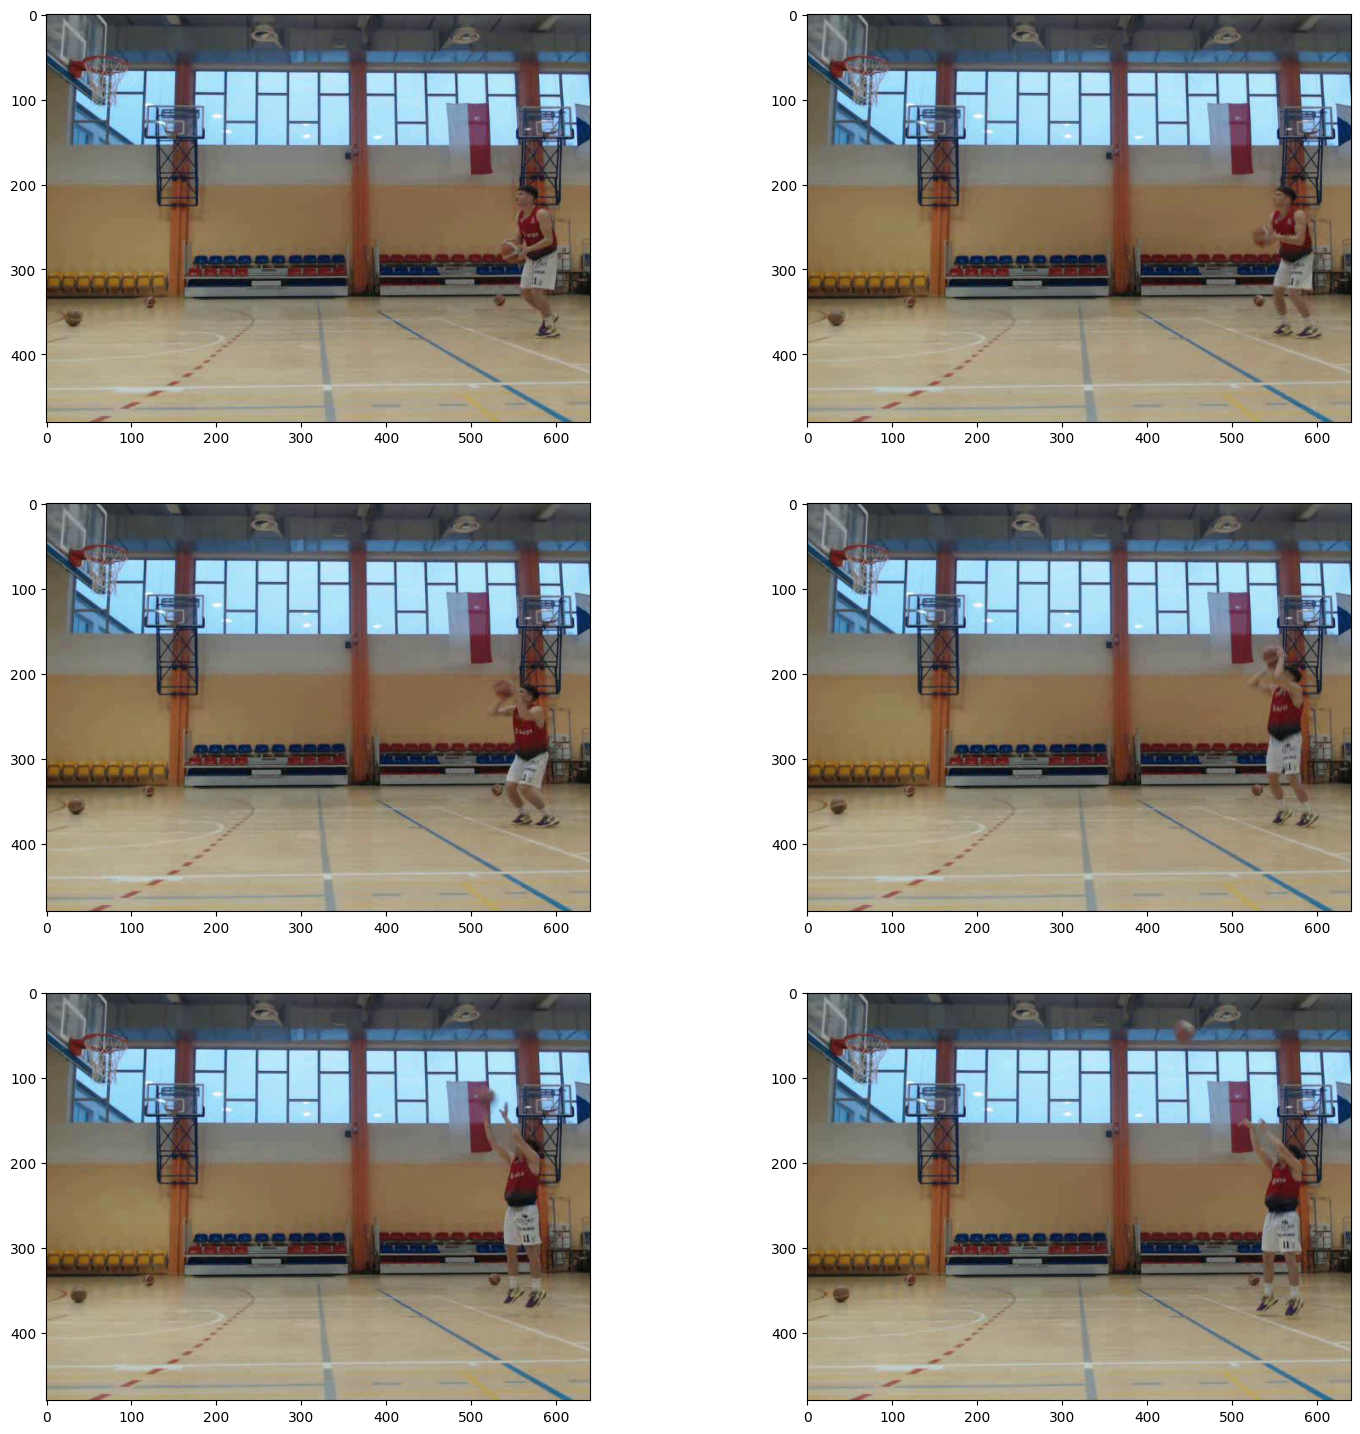

In [83]:
import matplotlib.pyplot as plt
_, axs = plt.subplots(3, 2, figsize=(18, 18))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i == 0:
        img = Image.open(f'/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/{i}.png')
    else:
        img = Image.open(f'/home/s175668/raid/Praca-Magisterska/Repozytorium/output_img/{(i*2)+2}.png')
    ax.imshow(img)
plt.show()

# Przebieg kp

In [56]:
import json
with open('/home/s175668/raid/Praca-Magisterska/dataset/pose3d/side/1014_adam_side_0.json') as f:
    json_3d = json.load(f)
    

In [57]:
all_frames = []
for frame in json_3d:
            frame_id = frame['frame_id']
            pose_3d = np.array(frame['instances'][0]['keypoints'])
            print(pose_3d)
            all_frames.append(pose_3d)
            
pose = np.stack(all_frames)          
pose = pose.transpose(1, 2, 0)

[[ 1.80690156e-04 -1.95899192e-05  2.80785025e-06]
 [ 6.46615475e-02  3.42039913e-02 -9.44659673e-03]
 [ 1.11809991e-01 -2.15297893e-01 -1.93089992e-01]
 [ 1.12146847e-01 -6.00847960e-01 -4.01309699e-01]
 [-6.46862835e-02 -3.42189036e-02  9.45676677e-03]
 [-3.65150534e-02 -3.43651652e-01 -1.99575990e-01]
 [ 7.78412540e-03 -7.25337505e-01 -4.07150447e-01]
 [ 3.16844471e-02  3.18120345e-02  1.70709342e-01]
 [ 4.71332483e-02  3.02945785e-02  3.96905303e-01]
 [ 1.11440457e-01 -1.96090378e-02  4.50265974e-01]
 [ 1.16379432e-01  4.90961075e-02  5.05509257e-01]
 [-3.02180573e-02 -3.40072811e-02  3.55680734e-01]
 [ 2.31668502e-02 -1.94785640e-01  2.00841174e-01]
 [ 2.13535205e-01 -8.51062089e-02  1.75240502e-01]
 [ 1.15240142e-01  7.93843865e-02  3.32347453e-01]
 [ 1.66756019e-01  1.36321425e-01  1.91000804e-01]
 [ 3.04792404e-01  5.15261330e-02  1.35551378e-01]]
[[ 1.76349029e-04 -1.74392917e-05  3.24214489e-06]
 [ 6.54894337e-02  3.42581980e-02 -8.14891141e-03]
 [ 1.16684593e-01 -2.19726726e

In [58]:
parts = ['Środek ciężkości', ' Prawe biodro', 'Prawe kolano', 'Prawa kostka', 'Lewe biodro', 'Lewe kolano',
         'Lewa kostka', 'Tułów', 'Szyja', 'Prawe oko', 'Lewe oko', 'Lewy bark', 'Lewy łokieć', 'Lewy nadgarstek',
         'Prawy bark', 'Prawy łokieć', 'Prawy nadgatsrek']

In [59]:
pose.shape

(17, 3, 18)

In [60]:
 mmpose_idx = [17, 6, 8, 10, 7, 9, 12, 14, 16, 13, 15, 2, 1, 4, 3]

In [61]:
colors = ['green', 'red', 'blue']
axis = ['x', 'y', 'z']

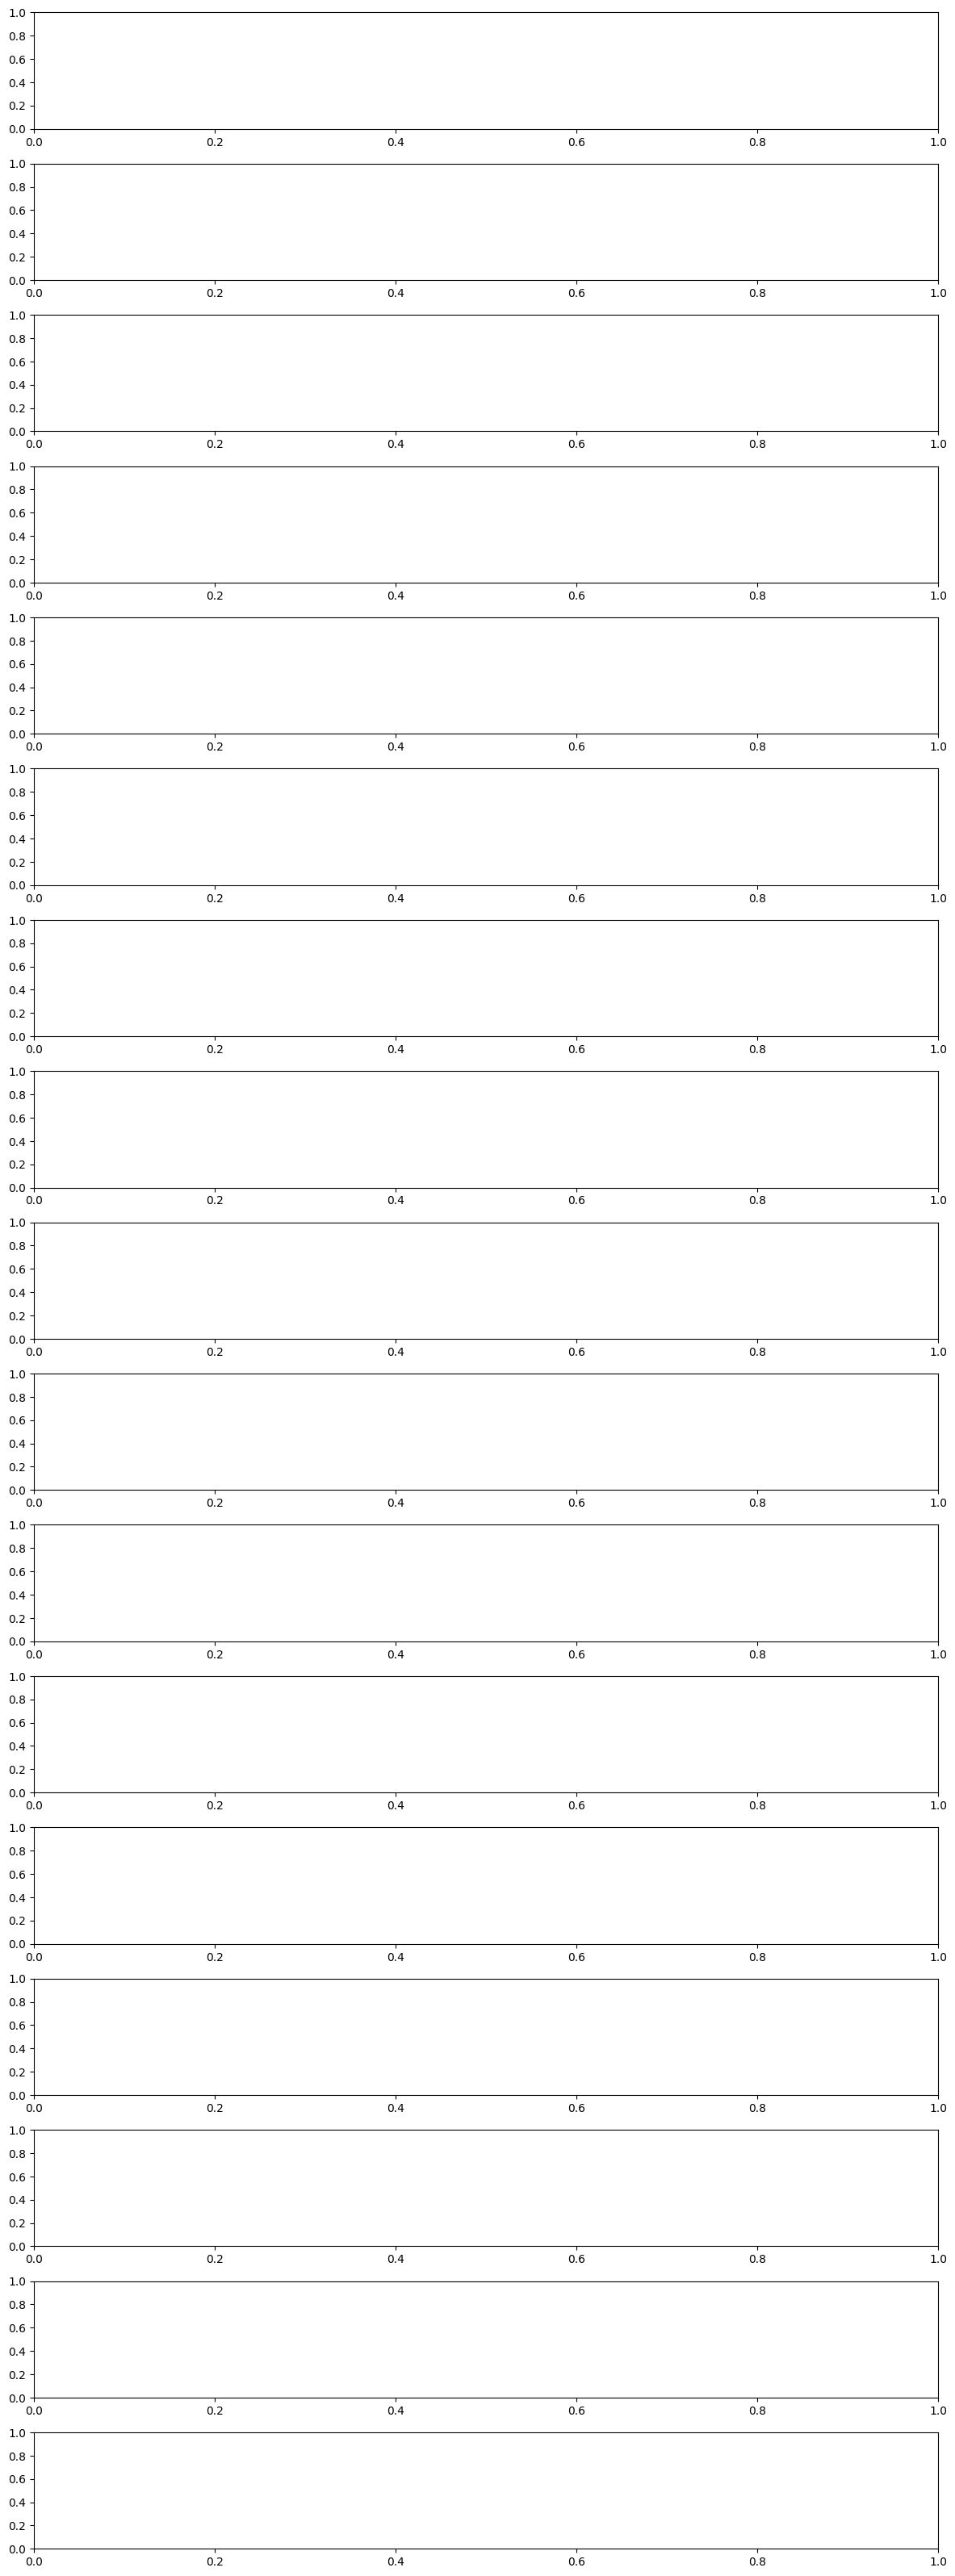

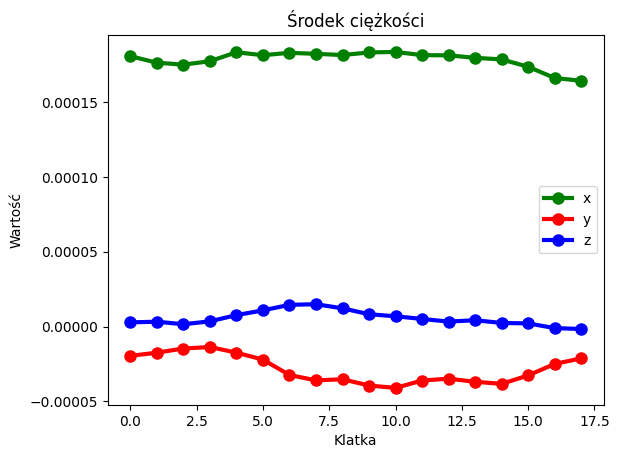

<Figure size 640x480 with 0 Axes>

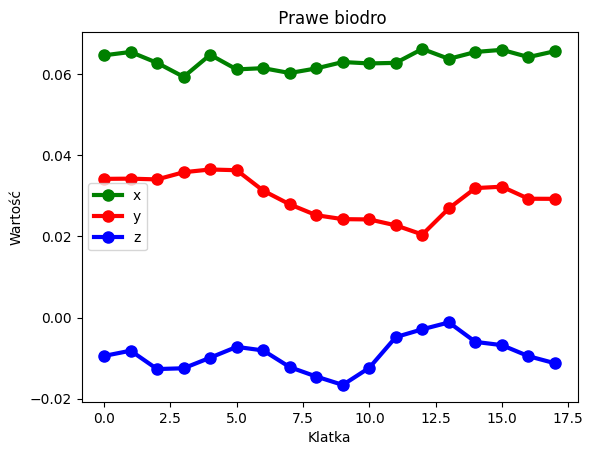

<Figure size 640x480 with 0 Axes>

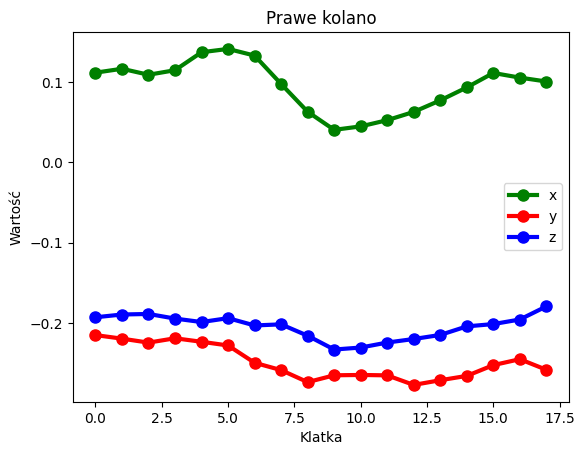

<Figure size 640x480 with 0 Axes>

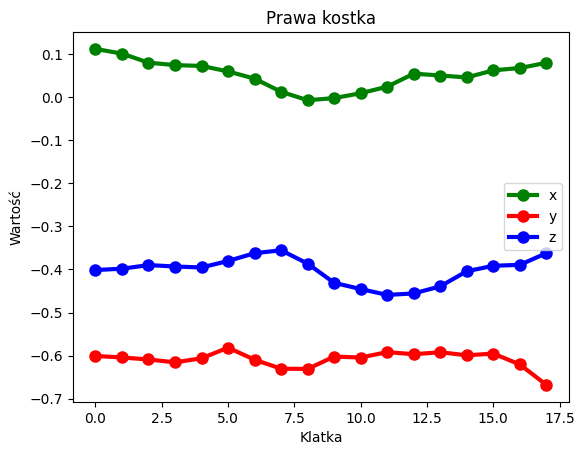

<Figure size 640x480 with 0 Axes>

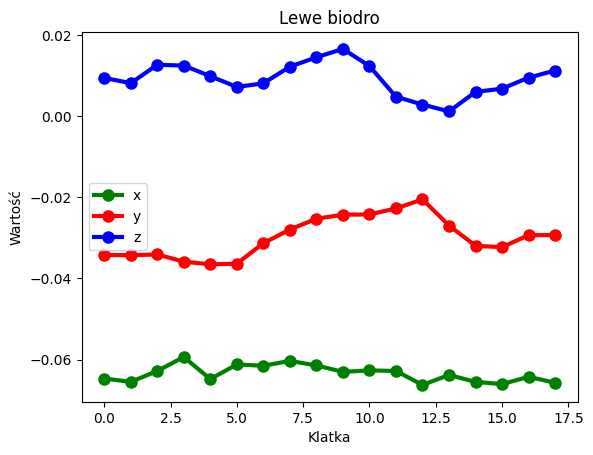

<Figure size 640x480 with 0 Axes>

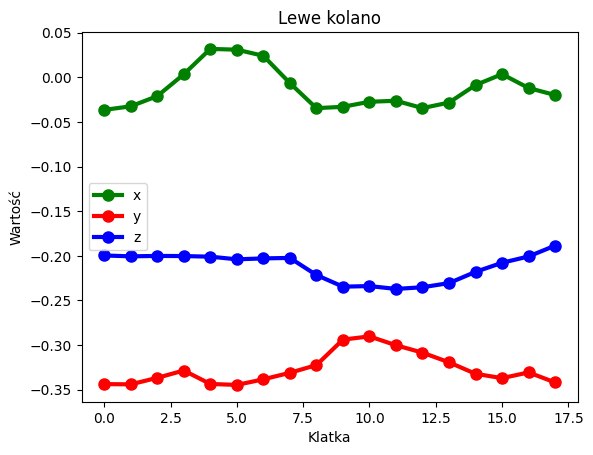

<Figure size 640x480 with 0 Axes>

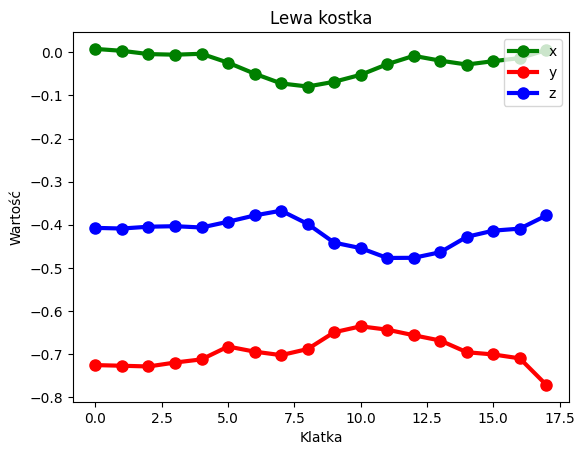

<Figure size 640x480 with 0 Axes>

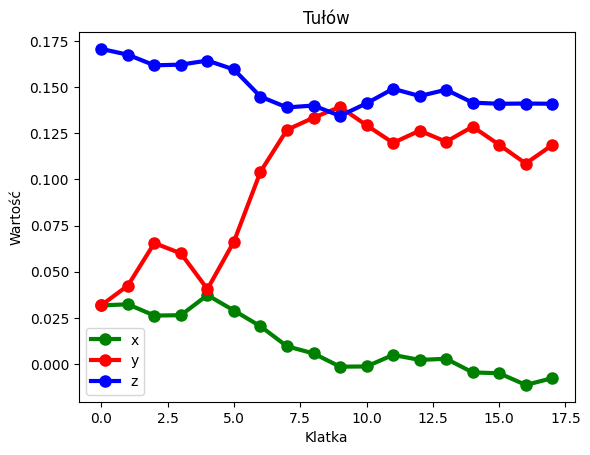

<Figure size 640x480 with 0 Axes>

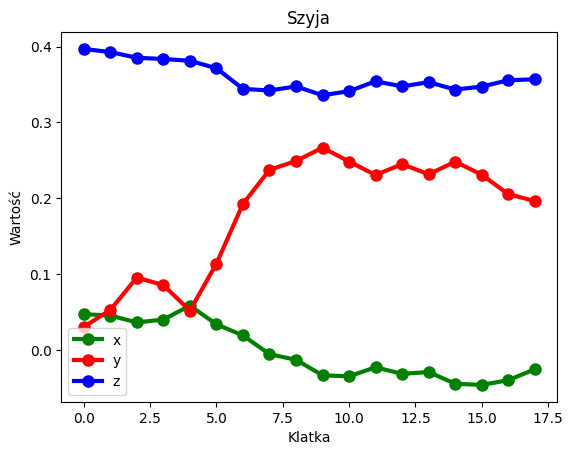

<Figure size 640x480 with 0 Axes>

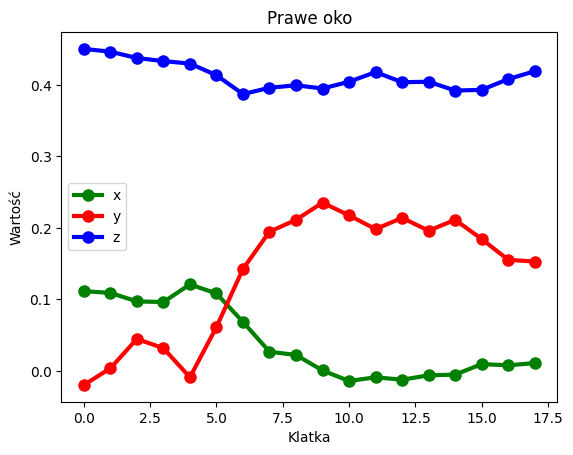

<Figure size 640x480 with 0 Axes>

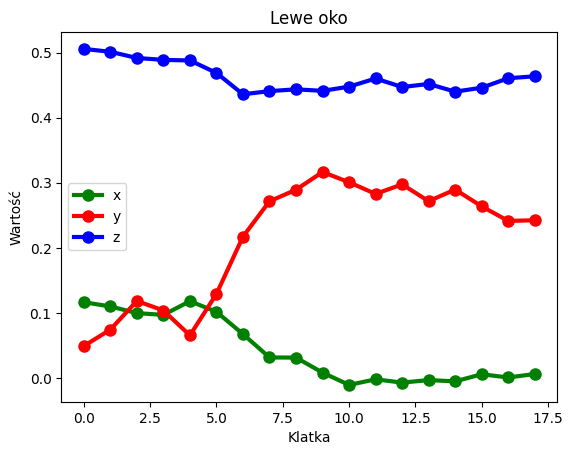

<Figure size 640x480 with 0 Axes>

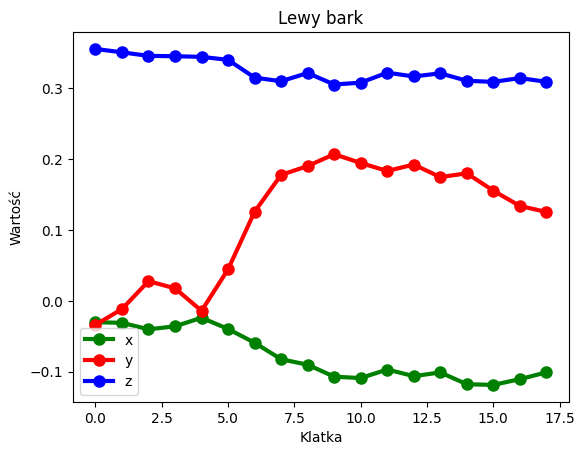

<Figure size 640x480 with 0 Axes>

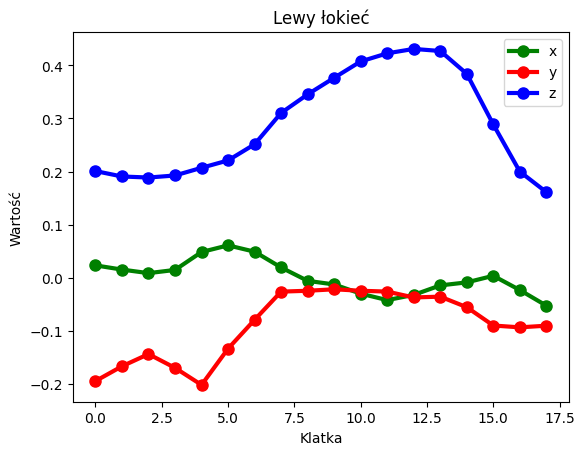

<Figure size 640x480 with 0 Axes>

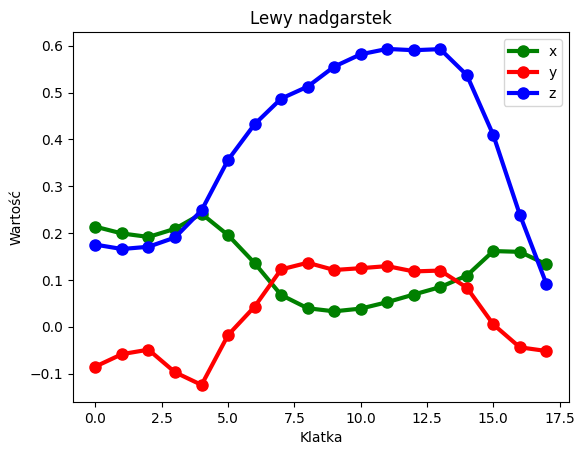

<Figure size 640x480 with 0 Axes>

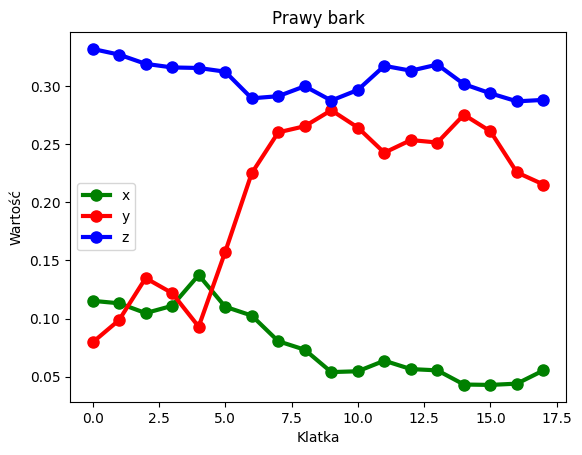

<Figure size 640x480 with 0 Axes>

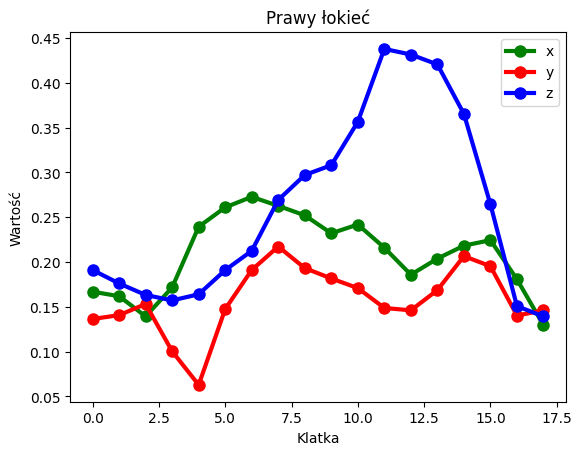

<Figure size 640x480 with 0 Axes>

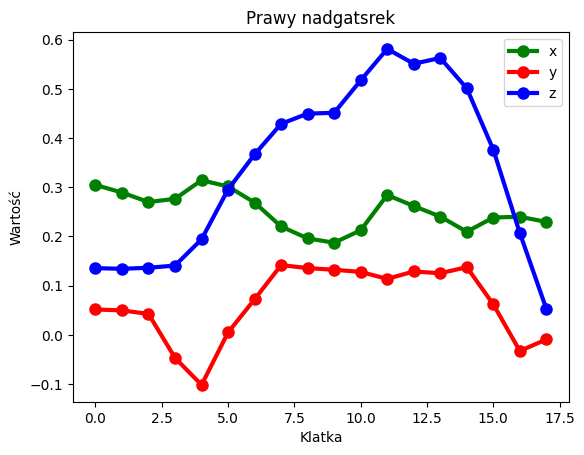

<Figure size 640x480 with 0 Axes>

In [71]:

fig, axs = plt.subplots(17,1, figsize=(12, 32))
fig.tight_layout(pad=1.0)
axs = axs.flatten()
timestep = [i for i in range(18)]
z = 0
i = 0
for i, channels in enumerate(pose):
    fig, axs = plt.subplots()

       
    for z, ch in enumerate(channels):

        axs.plot(timestep, ch, color=colors[z], linewidth = 3,
                 marker='o', markersize=8, label = axis[z])
        
        
    axs.set_title(parts[i])
    axs.set_xlabel("Klatka")
    axs.set_ylabel("Wartość")    
    axs.legend()
    plt.show()
    plt.savefig(f'/home/s175668/raid/Praca-Magisterska/visualization/plots/{parts[i].replace(" ", "_")}.png')

        
    

In [46]:
df

,LEFT_SHOULDER_X,LEFT_SHOULDER_Y,RIGH_SHOULDER_X,RIGH_SHOULDER_Y,LEFT_ELBOW_X,LEFT_ELBOW_Y,RIGHT_ELBOW_X,RIGHT_ELBOW_Y,LEFT_WRIST_X,LEFT_WRIST_Y,...,RIGHT_HIPS_Y,LEFT_KNEE_X,LEFT_KNEE_Y,RIGHT_KNEE_X,RIGHT_KNEE_Y,LEFT_ANKLE_X,LEFT_ANKLE_Y,RIGHT_ANKLE_X,RIGHT_ANKLE_Y,TARGET
0,0.913445,0.524440,0.872779,0.526662,0.925570,0.587698,0.874612,0.579924,0.889774,0.611318,...,0.629481,0.909205,0.712915,0.882112,0.716104,0.920809,0.792660,0.925053,0.777227,1
1,0.912510,0.520784,0.870700,0.523292,0.925713,0.584655,0.872496,0.579097,0.888886,0.612664,...,0.627135,0.910295,0.712124,0.880993,0.714661,0.918538,0.793850,0.924487,0.774319,1
2,0.909571,0.514778,0.868127,0.516154,0.928108,0.575459,0.871653,0.572982,0.891771,0.607912,...,0.621104,0.905614,0.707167,0.875127,0.706191,0.924810,0.791306,0.904119,0.777134,1
3,0.907916,0.512569,0.864689,0.512284,0.925559,0.572844,0.866992,0.565526,0.886528,0.602572,...,0.619221,0.899369,0.704596,0.870813,0.701874,0.924009,0.786707,0.887562,0.779149,1
4,0.904885,0.525019,0.862635,0.526785,0.905044,0.589928,0.860151,0.577600,0.859159,0.580232,...,0.635142,0.896841,0.716123,0.863938,0.712577,0.926604,0.796253,0.882020,0.788633,1
5,0.902719,0.537898,0.863226,0.535423,0.890474,0.582506,0.838203,0.553956,0.862131,0.551780,...,0.647093,0.888119,0.725253,0.857588,0.717865,0.921245,0.794353,0.879462,0.788343,1
6,0.905033,0.542559,0.867176,0.541757,0.892147,0.556190,0.825093,0.547492,0.871158,0.508524,...,0.654192,0.883067,0.731732,0.853462,0.725922,0.919561,0.796684,0.876879,0.792089,1
7,0.899754,0.501757,0.857088,0.503475,0.908461,0.547521,0.823460,0.500956,0.884587,0.490831,...,0.631172,0.879784,0.721494,0.853966,0.719268,0.920965,0.795174,0.879559,0.791960,1
8,0.903557,0.456784,0.853197,0.460664,0.907498,0.514177,0.819937,0.472618,0.877604,0.474112,...,0.604698,0.893254,0.707415,0.855011,0.705062,0.919836,0.793476,0.875372,0.784547,1
9,0.901647,0.446948,0.861308,0.448561,0.886110,0.438276,0.821185,0.434700,0.860981,0.383863,...,0.572902,0.894902,0.669783,0.854613,0.667766,0.908233,0.763686,0.862585,0.757144,1


In [ ]:
  
# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
# setting x and y axis range
plt.ylim(1,8)
plt.xlim(1,8)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('Some cool customizations!')
  
# function to show the plot
plt.show()